In [1]:
!python -m spacy download en_core_web_md

C:\Users\Admin\anaconda3\python.exe: No module named spacy


In [3]:
!pip install spacy

     ---------------------------------------- 12.1/12.1 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 449.9/449.9 kB 2.6 MB/s eta 0:00:00
     --------------------------------------- 96.7/96.7 kB 70.1 kB/s eta 0:00:00
     ------------------------------------ 181.6/181.6 kB 844.4 kB/s eta 0:00:00
     -------------------------------------- 42.8/42.8 kB 260.6 kB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 58.6/58.6 kB 514.9 kB/s eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 849.6 kB/s eta 0:00:00


In [6]:
!pip install wordcloud

     ------------------------------------ 152.9/152.9 kB 198.7 kB/s eta 0:00:00


In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [10]:
#from google.colab import files
#uploaded = files.upload()

In [11]:
#import io
#book = pd.read_csv(io.BytesIO(uploaded['apple.txt']),error_bad_lines=False)
#book

In [15]:
book = pd.read_csv("apple.txt", error_bad_lines = False)
book

C:\Users\Admin\AppData\Local\Temp\ipykernel_224\2953790283.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book = pd.read_csv("apple.txt", error_bad_lines = False)
b'Skipping line 6: expected 1 fields, saw 14\n'


,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [12]:
book.shape

(40, 1)

In [16]:
# remove both the leading and the trailing characters
book = [y.strip() for y in book]
book

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [17]:
# removes empty strings, because they are considered in Python as False
book = [x for x in book if x] 
book

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [18]:
# Joining the list into one string/text
text = ' '.join(book)
text

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by worki

In [39]:
#Punctuation

# with arguments (x, y, z)
# where 'x' and 'y' must be equal-length strings
# and characters in 'x' are replaced by characters in 'y'.
# 'z' is a string to be deleted (string.punctuation here)

no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

'Its amazing battery last around 10 12 hrsbest laptop for students and coders Finally a MacBook possession Got it in 50k in Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine other laptops crash and become defunct in 610 years no antivirus required security of data and transactions much better Terrific sense of possession  prideBad News Problems will be there if you are switching from windows based system  very less space in hard disk no CD drive inability to transfer data from Mac to your existing external hard disc unless you format it apps are mostly paid and re unreasonably expensive no free apps which are available otherwise on google play store even the angry bird costs Rs 400  all printers are not compatible eg the most economical MFD laser printer RICOH SP 111 cant be used huge compatibility issues with Pages MS Word and Keynote powerpoint unless you master it by working on these still mostly the document and slides ei

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
sample = "Hey, Hii!!!, How r u? "
sample

'Hey, Hii!!!, How r u? '

In [36]:
t = sample.maketrans('H','F','!')
t

{72: 70, 33: None}

In [38]:
sample.translate(t)

'Fey, Fii, Fow r u? '

In [42]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [43]:
#Tokenization
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(no_punc_text)
text_tokens

['Its',
 'amazing',
 'battery',
 'last',
 'around',
 '10',
 '12',
 'hrsbest',
 'laptop',
 'for',
 'students',
 'and',
 'coders',
 'Finally',
 'a',
 'MacBook',
 'possession',
 'Got',
 'it',
 'in',
 '50k',
 'in',
 'Diwali',
 'sale',
 'Technically',
 'good',
 'laptopGood',
 'Newsluxury',
 'product',
 'niche',
 'technology',
 'good',
 'battery',
 'life',
 'reliable',
 'machine',
 'other',
 'laptops',
 'crash',
 'and',
 'become',
 'defunct',
 'in',
 '610',
 'years',
 'no',
 'antivirus',
 'required',
 'security',
 'of',
 'data',
 'and',
 'transactions',
 'much',
 'better',
 'Terrific',
 'sense',
 'of',
 'possession',
 'prideBad',
 'News',
 'Problems',
 'will',
 'be',
 'there',
 'if',
 'you',
 'are',
 'switching',
 'from',
 'windows',
 'based',
 'system',
 'very',
 'less',
 'space',
 'in',
 'hard',
 'disk',
 'no',
 'CD',
 'drive',
 'inability',
 'to',
 'transfer',
 'data',
 'from',
 'Mac',
 'to',
 'your',
 'existing',
 'external',
 'hard',
 'disc',
 'unless',
 'you',
 'format',
 'it',
 'apps'

In [44]:
text_tokens[0:50]

['Its',
 'amazing',
 'battery',
 'last',
 'around',
 '10',
 '12',
 'hrsbest',
 'laptop',
 'for',
 'students',
 'and',
 'coders',
 'Finally',
 'a',
 'MacBook',
 'possession',
 'Got',
 'it',
 'in',
 '50k',
 'in',
 'Diwali',
 'sale',
 'Technically',
 'good',
 'laptopGood',
 'Newsluxury',
 'product',
 'niche',
 'technology',
 'good',
 'battery',
 'life',
 'reliable',
 'machine',
 'other',
 'laptops',
 'crash',
 'and',
 'become',
 'defunct',
 'in',
 '610',
 'years',
 'no',
 'antivirus',
 'required',
 'security',
 'of']

In [45]:
len(text_tokens)

3444

In [46]:
#Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [47]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#my_stop_words.append('the')
#my_stop_words.append('Its')

In [53]:
# Simplified look of the no_stop_tokes for loop
""" final_words = []
  for word in text_tokens:
   if word in my_stop_words:
     'do nothing'
   else:
     final_words.append(word)"""

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'students', 'coders', 'Finally', 'MacBook', 'possession', 'Got', '50k', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'laptops', 'crash', 'become', 'defunct', '610', 'years', 'antivirus', 'required', 'security', 'data']


In [54]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'students', 'coders', 'finally', 'macbook', 'possession', 'got', '50k', 'diwali', 'sale', 'technically', 'good', 'laptopgood', 'newsluxury', 'product', 'niche', 'technology']


In [55]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['it', 'amaz', 'batteri', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'student', 'coder', 'final', 'macbook', 'possess', 'got', '50k', 'diwali', 'sale', 'technic', 'good', 'laptopgood', 'newsluxuri', 'product', 'nich', 'technolog', 'good', 'batteri', 'life', 'reliabl', 'machin', 'laptop', 'crash', 'becom', 'defunct', '610', 'year', 'antiviru', 'requir', 'secur', 'data']


In [56]:
!python -m spacy download en

     ---------------------------------------- 12.8/12.8 MB 1.4 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-08-28 19:44:01.509847: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-08-28 19:44:01.509904: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-28 19:47:43.823176: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-08-28 19:47:43.823212: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-28 19:47:43.895923: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-A3K3C5N
2022-08-28 19:47:43.896244: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-A3K3C5N


In [58]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [59]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Its amazing battery last around 10 12 hrsbest laptop students coders Finally MacBook possession Got 50k Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine laptops crash become defunct 610 years antivirus required security data


In [60]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsb', 'laptop', 'student', 'coder', 'finally', 'MacBook', 'possession', 'Got', '50k', 'diwali', 'sale', 'technically', 'good', 'laptopgood', 'newsluxury', 'product', 'niche', 'technology']


#### Feature Extraction

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [62]:
#pd.DataFrame(vectorizer.vocabulary_, columns=vectorizer.vocabulary_.keys())

ValueError: If using all scalar values, you must pass an index

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

In [64]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)

,0
yr,888
youtube,887
you,886
yes,885
yearsmy,884
year,883
yay,882
xcode,881
writer,880
write,879


In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(20)

In [65]:
print(vectorizer.vocabulary_)

{'its': 433, 'amazing': 69, 'battery': 118, 'last': 457, 'around': 94, '10': 0, '12': 6, 'hrsb': 393, 'laptop': 450, 'student': 764, 'coder': 179, 'finally': 319, 'macbook': 489, 'possession': 611, 'got': 359, '50k': 34, 'diwali': 248, 'sale': 686, 'technically': 780, 'good': 356, 'laptopgood': 453, 'newsluxury': 541, 'product': 630, 'niche': 543, 'technology': 781, 'life': 467, 'reliable': 662, 'machine': 491, 'crash': 204, 'become': 122, 'defunct': 225, '610': 44, 'year': 883, 'antivirus': 80, 'require': 670, 'security': 699, 'datum': 216, 'transaction': 819, 'much': 531, 'well': 858, 'terrific': 786, 'sense': 705, 'pridebad': 621, 'news': 540, 'problems': 626, 'switch': 773, 'window': 865, 'base': 116, 'system': 774, 'less': 464, 'space': 739, 'hard': 373, 'disk': 243, 'cd': 165, 'drive': 253, 'inability': 407, 'transfer': 820, 'mac': 488, 'exist': 290, 'external': 301, 'disc': 241, 'unless': 827, 'format': 330, 'app': 83, 'mostly': 525, 'pay': 587, 'unreasonably': 828, 'expensive':

In [68]:
print(vectorizer.get_feature_names()[50:100])

['9th', 'able', 'accidental', 'accounting', 'act', 'adapt', 'add', 'additionaly', 'advantage', 'affordable', 'after', 'again', 'againcontacte', 'ahead', 'air', 'all', 'almost', 'along', 'also', 'amazing', 'amazingnice', 'amazon', 'amazoni', 'among', 'and', 'android', 'angle', 'angry', 'another', 'answer', 'antivirus', 'anyone', 'anything', 'app', 'appario', 'apple', 'appleappleapple', 'apples', 'application', 'apprehensive', 'appropriate', 'appsnumber', 'april', 'arenot', 'around', 'ask', 'aspect', 'atleast', 'atomic', 'audio']


In [67]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [69]:
print(X.toarray().shape)

(2102, 889)


#### Let's see how can bigrams and trigrams can be included here

In [70]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,3),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(book)
bow_matrix_ngram

<40x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1014 stored elements in Compressed Sparse Row format>

In [71]:
print(vectorizer_ngram_range.get_feature_names())

['about', 'after', 'air', 'all', 'am', 'amazon', 'an', 'and', 'any', 'apple', 'are', 'around', 'as', 'at', 'battery', 'be', 'best', 'better', 'bought', 'but', 'buy', 'can', 'cost', 'display', 'even', 'external', 'fine', 'for', 'from', 'get', 'good', 'got', 'great', 'hard', 'have', 'if', 'if you', 'if you are', 'in', 'is', 'is not', 'issues', 'it', 'it is', 'its', 'just', 'keyboard', 'laptop', 'like', 'mac', 'macbook', 'macbook air', 'me', 'months', 'my', 'need', 'no', 'not', 'now', 'of', 'of the', 'on', 'on this', 'one', 'only', 'or', 'other', 'product', 'quality', 'sale', 'screen', 'service', 'service center', 'so', 'some', 'still', 'stopped', 'that', 'the', 'then', 'they', 'this', 'to', 'using', 'very', 'want', 'want to', 'warranty', 'was', 'which', 'while', 'will', 'windows', 'with', 'working', 'would', 'year', 'years', 'you', 'you are']


In [72]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 8 1]
 [1 0 0 ... 0 7 1]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 0]]


#### TFidf vectorizer

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",
                                                 analyzer='word',
                                                 ngram_range=(1,3),
                                                 max_features = 10)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(book)

In [74]:
print(vectorizer_n_gram_max_features.get_feature_names())

['and', 'for', 'in', 'is', 'it', 'of', 'the', 'this', 'to', 'you']


In [75]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.55488769 0.63197542 0.         0.         0.54102376 0.
  0.         0.         0.         0.        ]
 [0.4706046  0.14617727 0.3003391  0.         0.25027991 0.20577568
  0.30721178 0.         0.36025074 0.58121993]
 [0.         0.61188088 0.13968713 0.         0.17460705 0.0717794
  0.06123583 0.         0.25132788 0.7096012 ]
 [0.69744641 0.2647797  0.         0.27201116 0.         0.55910086
  0.23848767 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.33002593 0.37587476 0.38614036 0.09653509 0.40222525 0.19842146
  0.50782685 0.1079973  0.34737573 0.        ]
 [0.17585656 0.20028742 0.20575751 0.41151502 0.34292552 0.21146045
  0.72159729 0.         0.18510151 0.        ]
 [0.27344413 0.         0.10664598 0.5332299  0.         0.21920373
  0.467513   0.         0.38375916 0.46436089]
 [0.         0.         0.34711306 0.         0.         0.71346783
  0.60866755 0.         0.   

####  Generate wordcloud

In [77]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    
    # Set figure size
    plt.figure(figsize=(60, 40))

    # Display image
    plt.imshow(wordcloud) 
    
    # No axis details
    plt.axis("off")

In [79]:
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('apple')
stopwords.add('Amazon')
stopwords.add('laptop')

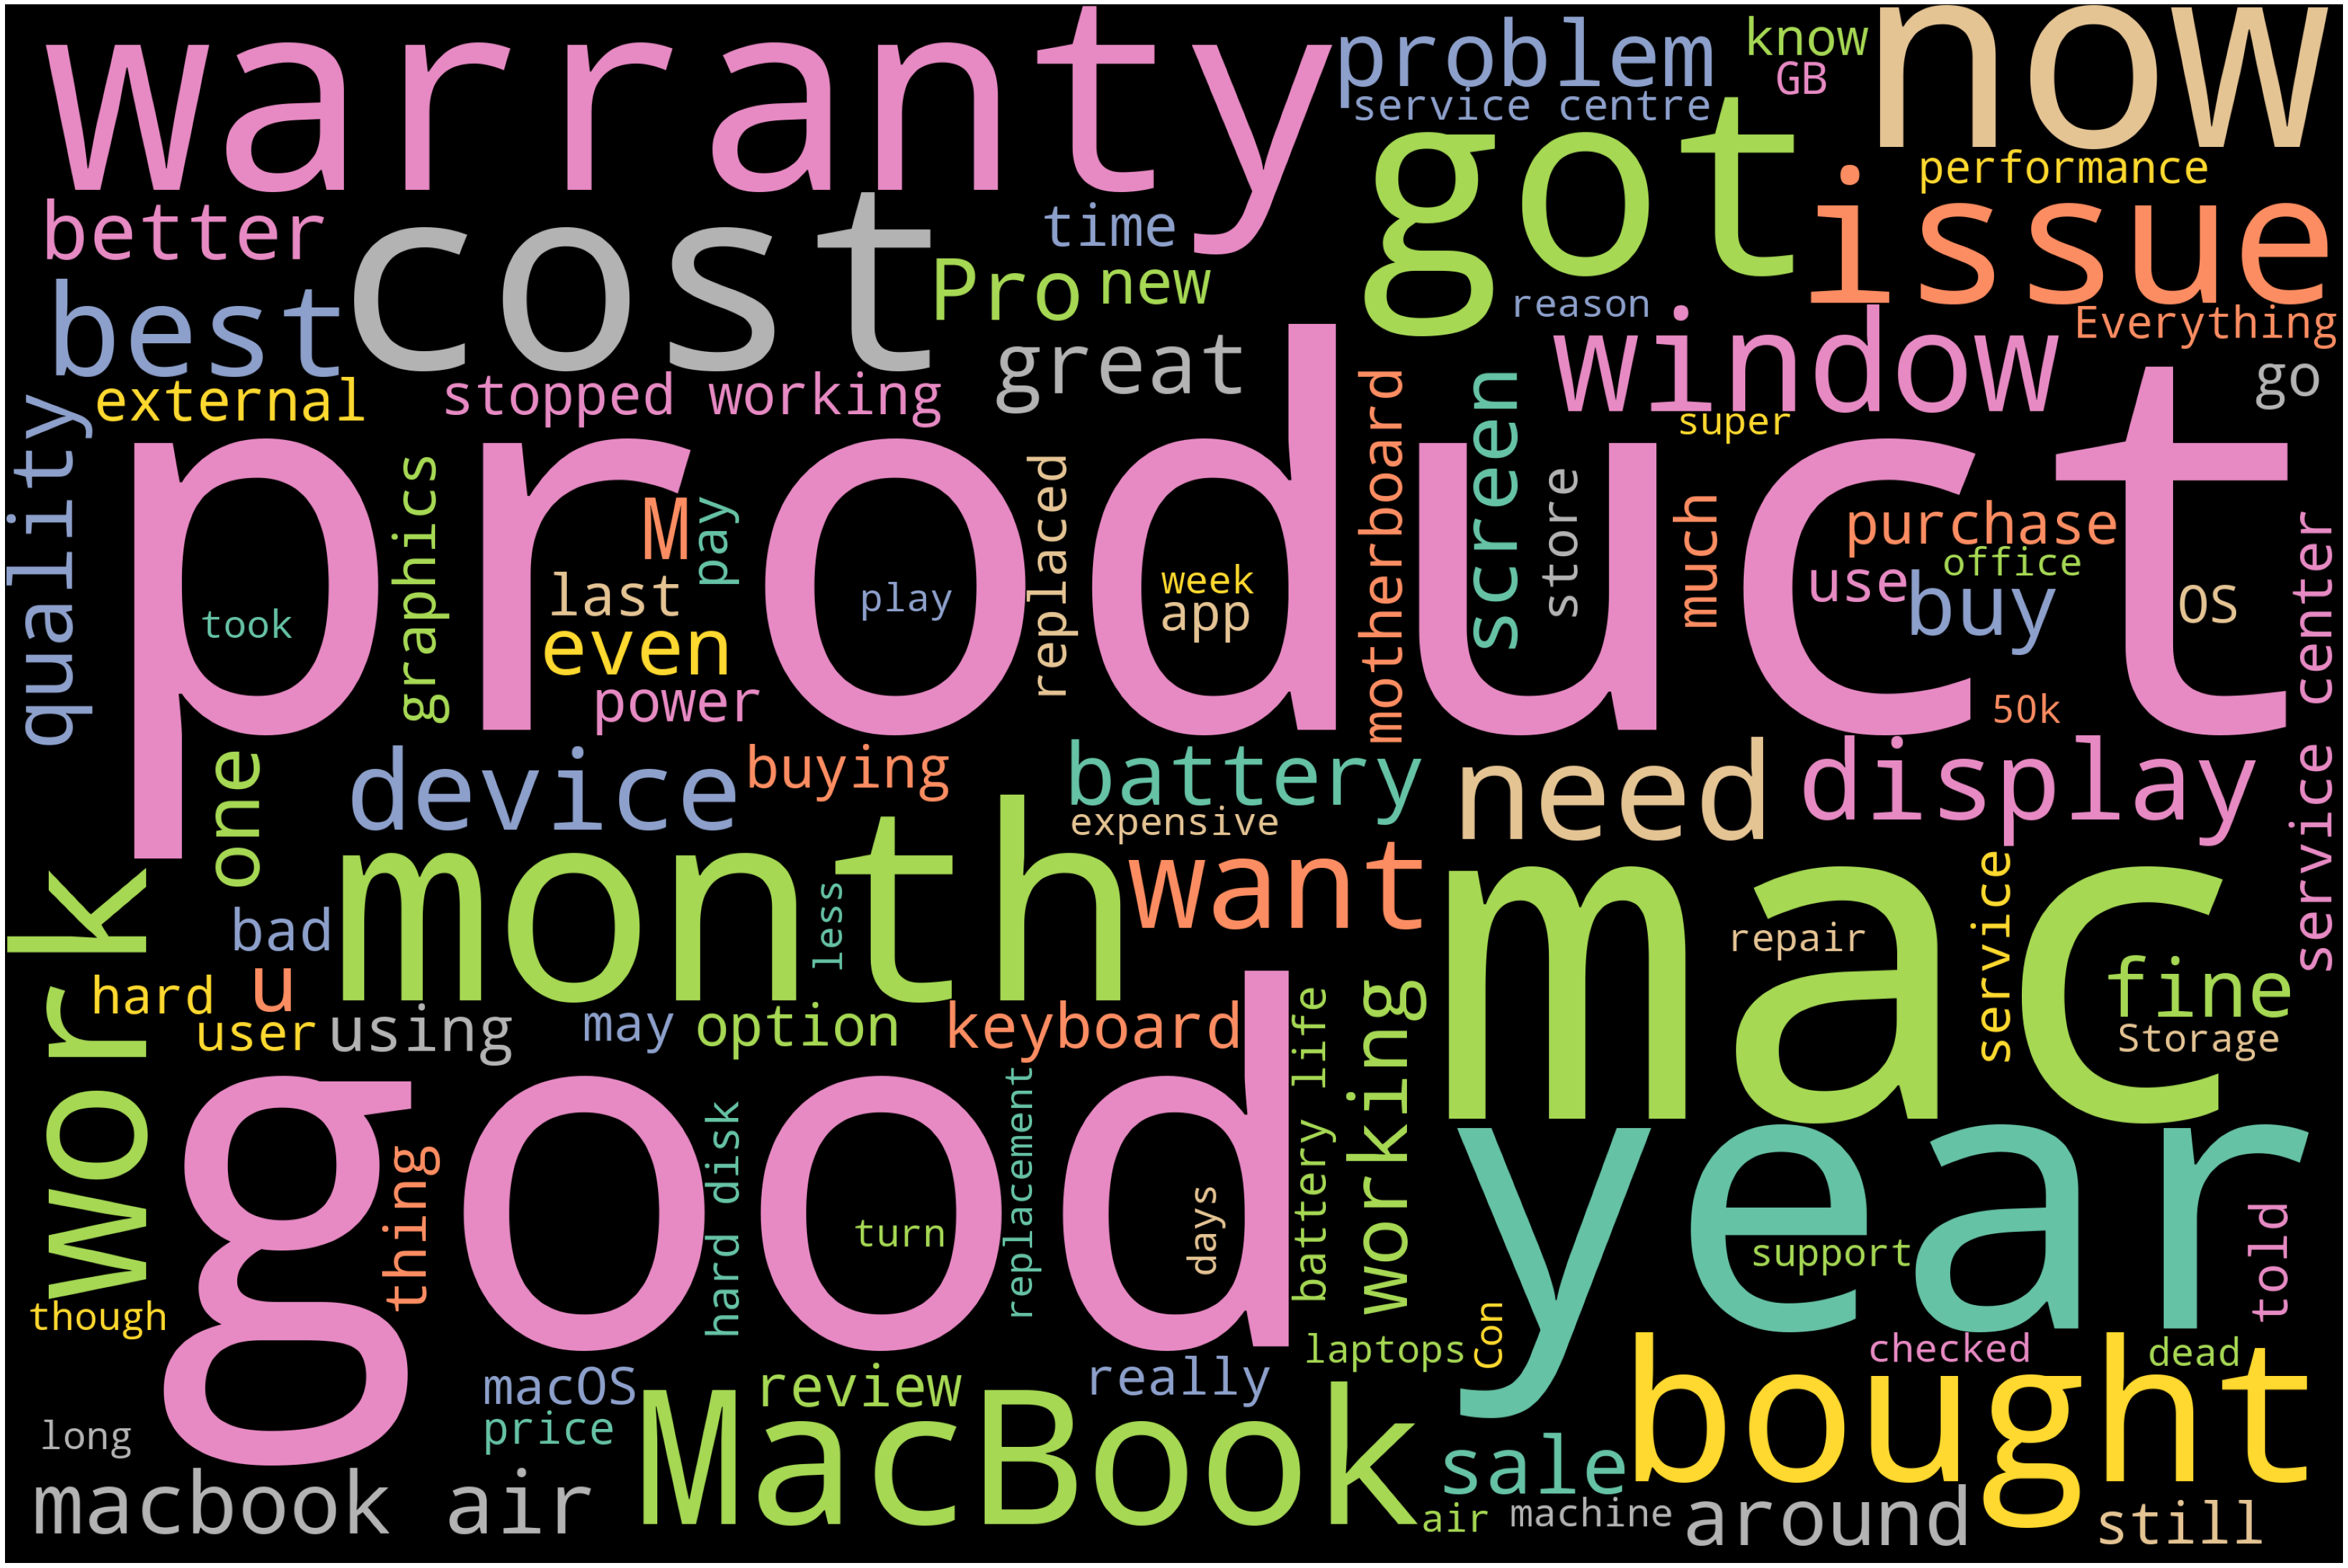

In [80]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, 
                      height = 2000,
                      background_color='black',
                      max_words=100,
                      colormap='Set2',
                      stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
# Save image
#wordcloud.to_file("wordcloud.png")